<a href="https://colab.research.google.com/github/abhinavdayal/EVA4/blob/master/S13/S13_YoloV3_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolo V3 OPENCV
Import classes

In [0]:
import cv2
import numpy as np

Mount drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load YOLO

In [0]:
# Load Yolo
net = cv2.dnn.readNet("/content/drive/My Drive/EVA4/yolov3/yolov3.weights", "/content/drive/My Drive/EVA4/yolov3/yolov3.cfg")
classes = []
with open("/content/drive/My Drive/EVA4/yolov3/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

Load image

In [0]:
# Loading image
def load_image(name):
  img = cv2.imread(name)
  #img = cv2.resize(img, None, fx=0.4, fy=0.4)
  return img
  

Convert image in format that YOLO expects (416x416)

In [0]:
# Detecting objects
def detect(img):
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  return net.forward(output_layers)

Find all the regions detection that are above specified threshold

In [0]:
# Showing informations on the screen
def extract_regions(outs, height, width):
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
  # non maximal suppression
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  return boxes, class_ids, indexes

Extract information and display

In [0]:
def display(img, boxes, class_ids, indexes):
  font = cv2.FONT_HERSHEY_PLAIN
  from google.colab.patches import cv2_imshow
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          color = colors[i]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
          cv2.putText(img, label, (x, y + 30), font, 2, color, 2)
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [0]:
def yolov3(image_name):
  img = load_image(image_name)
  height, width, _ = img.shape
  outs = detect(img)
  boxes, class_ids, indexes = extract_regions(outs, height, width)
  display(img, boxes, class_ids, indexes)

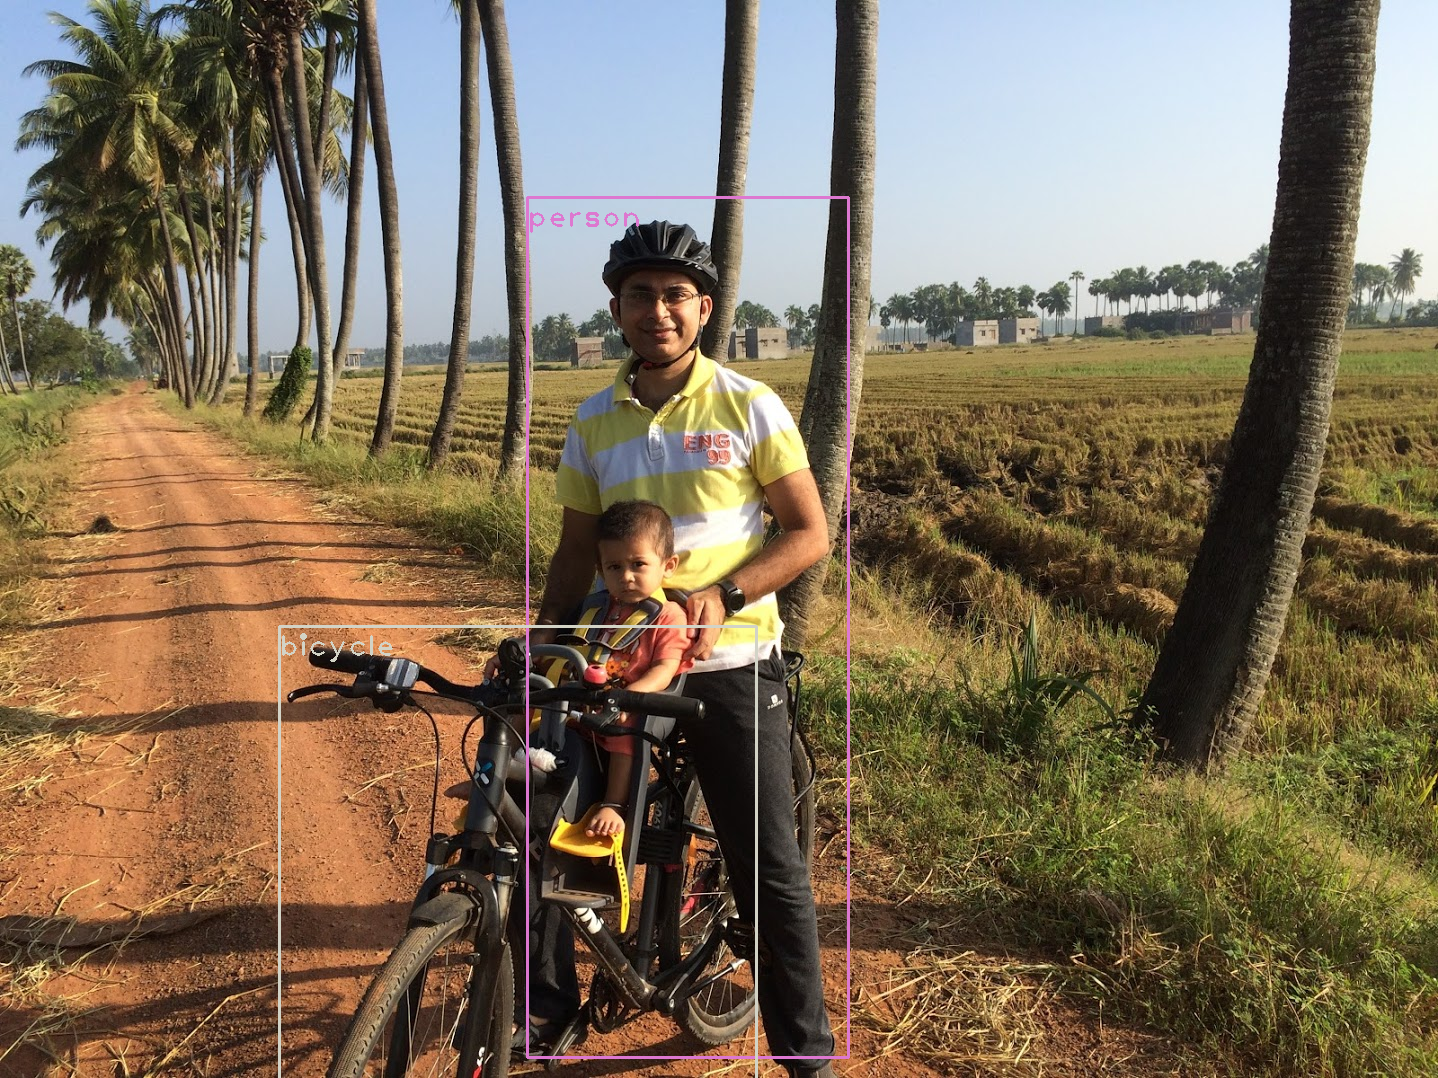

In [8]:
yolov3('IMG_1149.JPG')

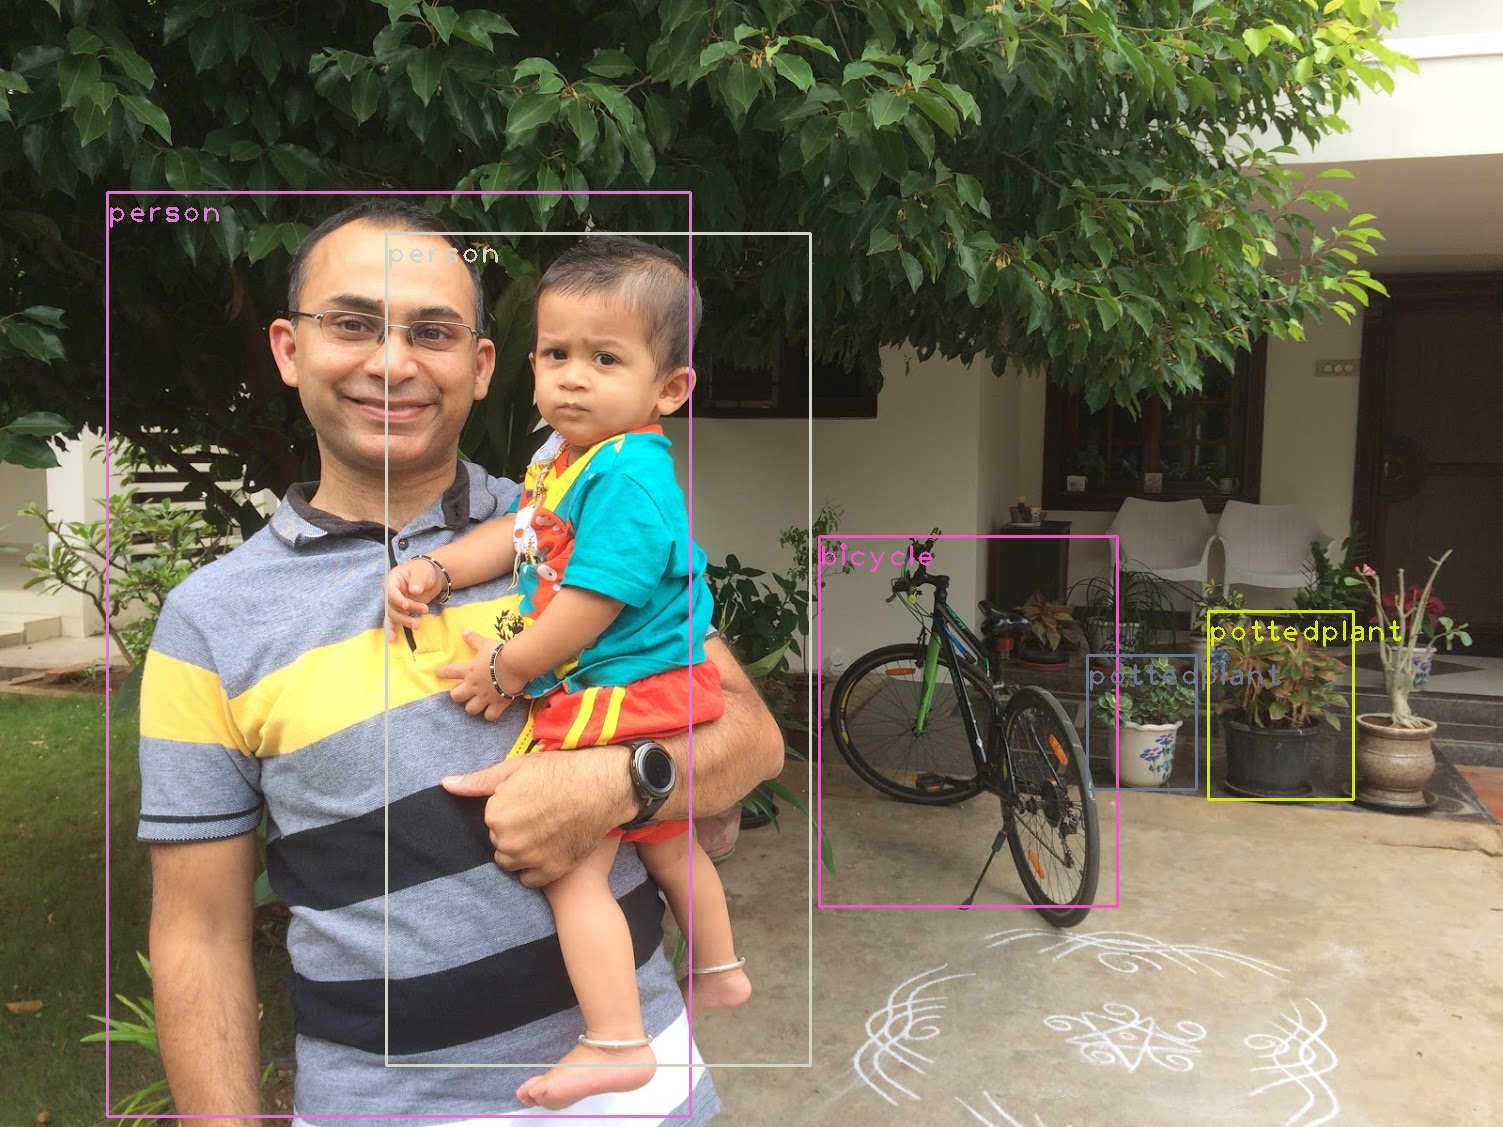

In [9]:
yolov3('IMG_1185.JPG')